# Utilisation de l'algorithme K-means

C'est un algorithme itératif. On place $k$ points au hasard qui sont les **centroïdes** des futurs clusters.
A chaque itération :

* on calcule pour chaque point du dataset sa distance à chaque centroïde, et on l'affecte à celui le plus proche.
* on déplace les centroïdes au centre du cluster (en calculant la moyenne de chaque composante - centre de gravité)

Pour éviter les valeurs aberrantes, on recommence plusieurs fois avec des centroides différents (`n_init`), et on prend le résultat final où le coût est le moins élevé (`nertia_`).

## Imports nécessaires

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Création d'un jeu de données d'entrainement

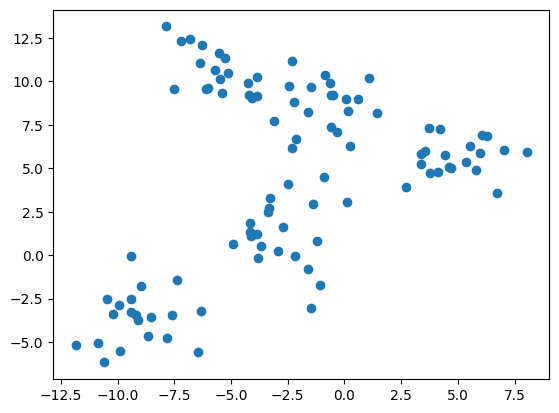

In [17]:
X, y = make_blobs(n_samples = 100, centers = 5, cluster_std = 1.5)
plt.scatter(X[:,0], X[:,1])

## Entrainement

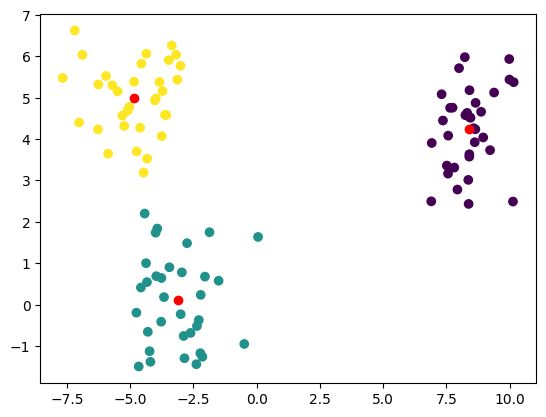

In [ ]:
model = KMeans(n_clusters=3, n_init = 15, max_iter = 200)

model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c= model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r') # positionne les centroïdes calculés

In [ ]:
model.inertia_ # Donne la somme des distance entre les centroïdes et les éléments.

216.62781425915867

### Comment choisir le nombre de cluster

On utilise une technique appelée **elbow method**, pour déterminer une zone de coude dans la minimisation du coût (`inertia_`)

Text(0, 0.5, 'Cout du modèle')

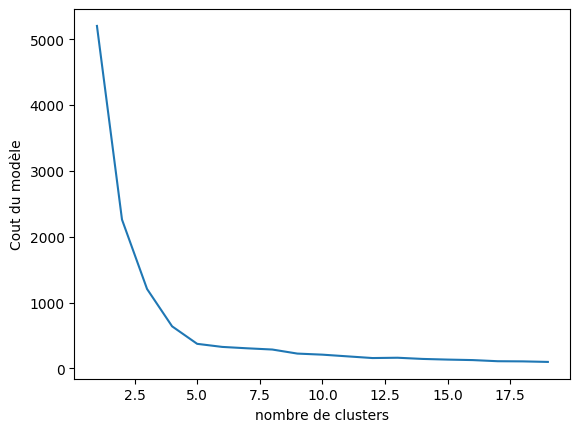

In [18]:
inertia = []
K_range = range(1,20)
for i in K_range :    
    model = KMeans(n_clusters = i ).fit(X)
    inertia.append(model.inertia_)
    
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modèle')

Algorithmes à voir aussi, présents dans Scikit (sur des clusters **non convexes** et **anisotropes**):

* DBSCAN
* AgglomerativeClustering